# Task-3

# To Explore Unsupervised Machine Learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [3]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
iris_df.columns = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

In [5]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris_df.info

<bound method DataFrame.info of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]>

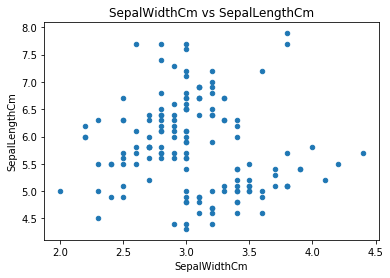

In [7]:
iris_df.plot(kind = 'scatter',x='SepalWidthCm',y='SepalLengthCm',title = 'SepalWidthCm vs SepalLengthCm')

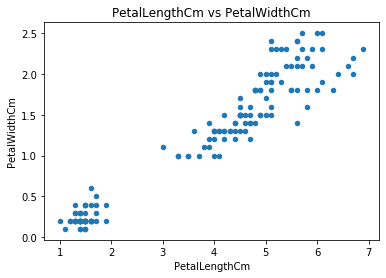

In [8]:
iris_df.plot(kind = 'scatter',x='PetalLengthCm',y='PetalWidthCm',title = 'PetalLengthCm vs PetalWidthCm')

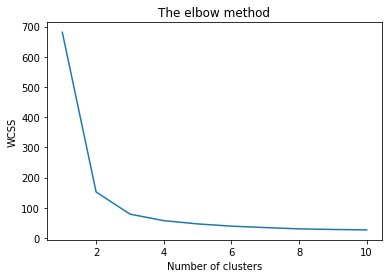

In [9]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [10]:
#Fittiing the Iris data to standard scalar
X_std = StandardScaler().fit_transform(iris_df)

In [11]:
#Implementation of KMeans
km = KMeans(n_clusters=3, max_iter=100)
km.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

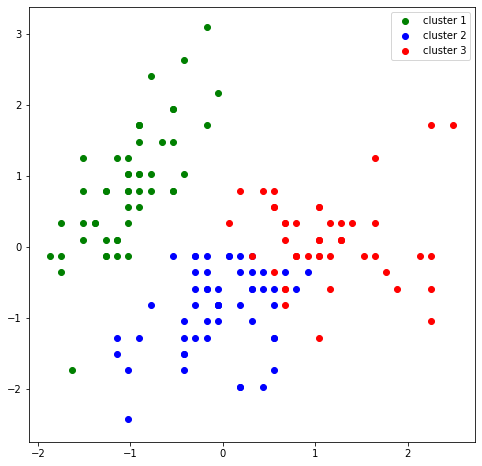

In [12]:
#Plotting the clustered data
fig, ax = plt.subplots(figsize=(8, 8))

plt.scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
            c='green', label='cluster 1')

plt.scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
            c='blue', label='cluster 2')

plt.scatter(X_std[km.labels_ == 2, 0], X_std[km.labels_ == 2, 1],
            c='red', label='cluster 3')

plt.legend()

In [13]:
iris_df = iris_df.values
clust=km.fit_predict(iris_df)

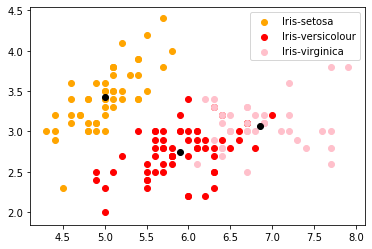

In [14]:
# Visualising the clusters on the Sepals
plt.scatter(iris_df[clust == 0, 0],iris_df[clust == 0, 1],c = 'orange',label = 'Iris-setosa')
plt.scatter(iris_df[clust == 1, 0],iris_df[clust == 1, 1],c = 'red',label = 'Iris-versicolour')
plt.scatter(iris_df[clust == 2, 0],iris_df[clust == 2, 1],c = 'pink',label = 'Iris-virginica')

# Plotting the centroids
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1],c = 'black')
plt.legend()

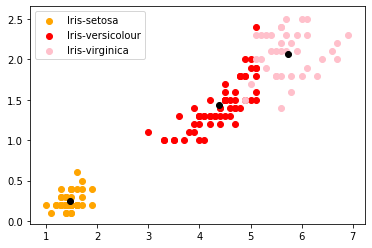

In [15]:
# Visualising the clusters on the Petals
plt.scatter(iris_df[clust == 0, 2],iris_df[clust == 0, 3],c = 'orange',label = 'Iris-setosa')
plt.scatter(iris_df[clust == 1, 2],iris_df[clust == 1, 3],c = 'red',label = 'Iris-versicolour')
plt.scatter(iris_df[clust == 2, 2],iris_df[clust == 2, 3],c = 'pink',label = 'Iris-virginica')

# Plotting the centroids
plt.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:,3],c = 'black')
plt.legend()